In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import cross_val_score

In [197]:
warnings.filterwarnings('ignore')

In [198]:
data = pd.read_csv("C:\\Users\\banga\\Downloads\\train.csv")

In [199]:
data.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
149            NCO26        7.235          Low Fat         0.076841   
3892           FDU31       10.500          Regular         0.024991   
5754           FDH47       13.500          Regular         0.128792   
2853           FDJ45       17.750          Low Fat         0.073525   
6417           FDS45        5.175          Regular         0.029490   

                  Item_Type  Item_MRP Outlet_Identifier  \
149               Household  117.5492            OUT035   
3892  Fruits and Vegetables  217.9508            OUT046   
5754          Starchy Foods   95.4068            OUT035   
2853                Seafood   34.8216            OUT049   
6417            Snack Foods  107.6622            OUT035   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
149                        2004       Small               Tier 2   
3892                       1997       Small               Tier 1   
5754                       2004       Small               Tier 2   
2853                       1999      Medium               Tier 1   
6417                       2004       Small               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
149   Supermarket Type1          1969.4364  
3892  Supermarket Type1          2821.6604  
5754  Supermarket Type1          1944.1360  
2853  Supermarket Type1           207.7296  
6417  Supermarket Type1          2858.2794

### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [200]:
data.shape

(8523, 12)

### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [201]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### Check Null Values In The Dataset

In [202]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [203]:
per = data.isnull().sum() * 100 / len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


### Taking Care of Duplicate Values

In [204]:
data.duplicated().any()

False

### Handling The missing Values

In [205]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [206]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

### Univariate Imputation

In [207]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [208]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [209]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [210]:
data.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_mean  Item_Weight_median  
0               9.3                 9.3

In [211]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.561688259836558
Item Weight variance after mean imputation 17.86012173506058
Item Weight variance after median imputation 17.869561454073647


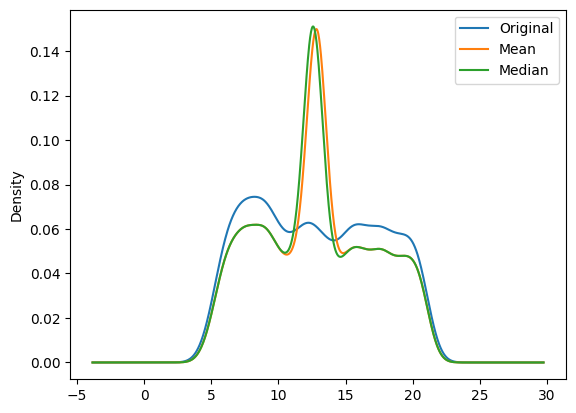

In [212]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

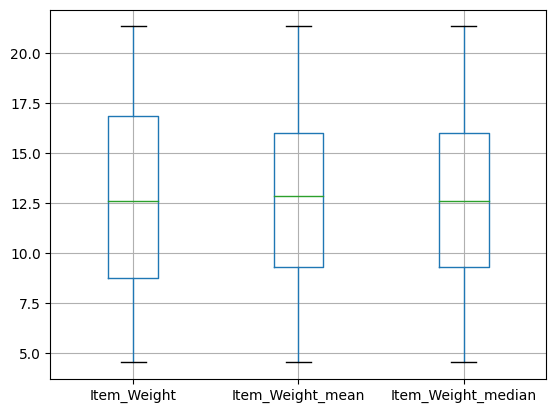

In [213]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [214]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

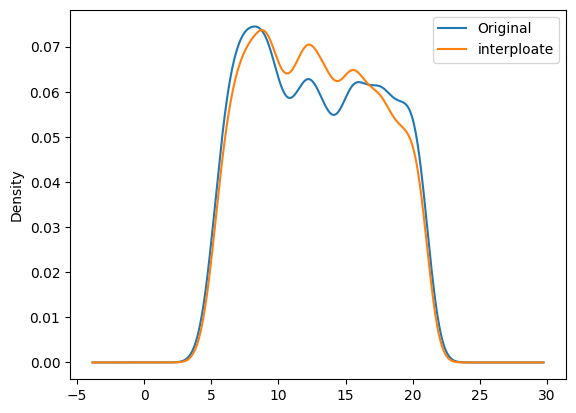

In [215]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

### Multivariate Imputaion

In [216]:
from sklearn.impute import KNNImputer

In [217]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [218]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

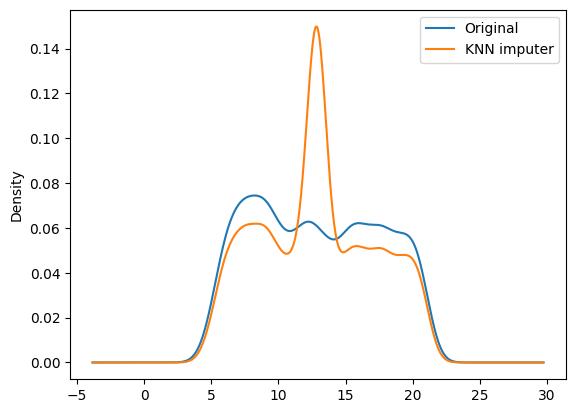

In [219]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [220]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [221]:
data.head(1)

Item_Identifier Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           FDA15          Low Fat         0.016047     Dairy  249.8092   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_interploate  
0                      9.3

In [222]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

### Outlet_Size 

In [223]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [224]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [225]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [226]:
mode_outlet

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [227]:
missing_values = data['Outlet_Size'].isnull()

In [228]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [229]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [230]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

### Item_Fat_Content

In [231]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [232]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [233]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [234]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

### Item_Visibility

In [235]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [236]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [237]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [238]:
data.head(1)

Item_Identifier Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           FDA15               LF         0.016047     Dairy  249.8092   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1           3735.138   

   Item_Weight_interploate  Item_Visibility_interpolate  
0                      9.3                     0.016047

In [239]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

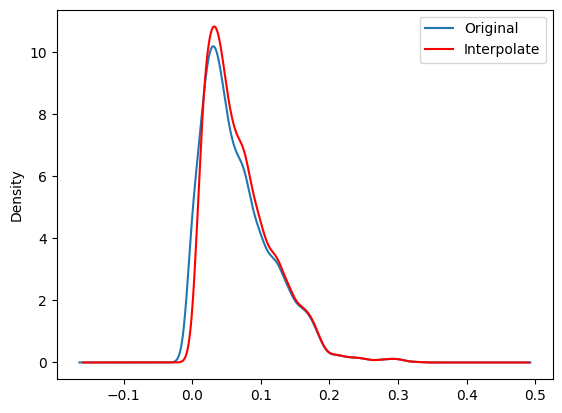

In [240]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [241]:
data = data.drop('Item_Visibility',axis=1)

In [242]:
data.head(1)

Item_Identifier Item_Fat_Content Item_Type  Item_MRP Outlet_Identifier  \
0           FDA15               LF     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  Item_Weight_interploate  \
0  Supermarket Type1           3735.138                      9.3   

   Item_Visibility_interpolate  
0                     0.016047

### Item_Type

In [243]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [244]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

### Item_Identifier

In [245]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [246]:
data['Item_Identifier'].value_counts().sample(5)

Item_Identifier
NCD07    4
FDG20    5
FDU11    6
NCQ38    7
FDR12    6
Name: count, dtype: int64

In [247]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [248]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

### Outlet_Establishment_Year

In [249]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [250]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [251]:
import datetime as dt

In [252]:
current_year = dt.datetime.today().year

In [253]:
current_year

2023

In [254]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']

In [255]:
data.head(1)

Item_Identifier Item_Fat_Content Item_Type  Item_MRP Outlet_Identifier  \
0              FD               LF     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   

         Outlet_Type  Item_Outlet_Sales  Item_Weight_interploate  \
0  Supermarket Type1           3735.138                      9.3   

   Item_Visibility_interpolate  Outlet_age  
0                     0.016047          24

In [256]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [257]:
data.head()

Item_Identifier Item_Fat_Content              Item_Type  Item_MRP  \
0              FD               LF                  Dairy  249.8092   
1              DR          Regular            Soft Drinks   48.2692   
2              FD               LF                   Meat  141.6180   
3              FD          Regular  Fruits and Vegetables  182.0950   
4              NC               LF              Household   53.8614   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0            OUT049      Medium               Tier 1  Supermarket Type1   
1            OUT018      Medium               Tier 3  Supermarket Type2   
2            OUT049      Medium               Tier 1  Supermarket Type1   
3            OUT010       Small               Tier 3      Grocery Store   
4            OUT013        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  Item_Weight_interploate  Item_Visibility_interpolate  \
0          3735.1380                     9.30                     0.016047   
1           443.4228                     5.92                     0.019278   
2          2097.2700                    17.50                     0.016760   
3           732.3800                    19.20                     0.015755   
4           994.7052                     8.93                     0.014751   

   Outlet_age  
0          24  
1          14  
2          24  
3          25  
4          36

### Handling Categorical Columns

In [258]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [259]:
data_encoded.head(3)

Item_Identifier  Item_Fat_Content  Item_Type  Item_MRP  Outlet_Identifier  \
0              1.0               0.0        4.0  249.8092                9.0   
1              0.0               1.0       14.0   48.2692                3.0   
2              1.0               0.0       10.0  141.6180                9.0   

   Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0          1.0                   0.0          1.0          3735.1380   
1          1.0                   2.0          2.0           443.4228   
2          1.0                   0.0          1.0          2097.2700   

   Item_Weight_interploate  Item_Visibility_interpolate  Outlet_age  
0                     9.30                     0.016047          24  
1                     5.92                     0.019278          14  
2                    17.50                     0.016760          24

In [260]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

In [261]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [262]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'A:\py\python.exe -m pip install --upgrade pip' command.


### Random Forest Regressor

### XGBRFRegressor

In [263]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


In [264]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

feature  XGBRF_importance
7                   Outlet_Type          0.349864
5                   Outlet_Size          0.192658
10                   Outlet_age          0.175040
3                      Item_MRP          0.131012
4             Outlet_Identifier          0.130735
6          Outlet_Location_Type          0.013184
9   Item_Visibility_interpolate          0.002493
8       Item_Weight_interploate          0.001770
2                     Item_Type          0.001566
0               Item_Identifier          0.000999
1              Item_Fat_Content          0.000680

In [265]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [266]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [267]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [268]:
final_data

Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Type  Outlet_age
0     249.8092                9.0          1.0          1.0          24
1      48.2692                3.0          1.0          2.0          14
2     141.6180                9.0          1.0          1.0          24
3     182.0950                0.0          2.0          0.0          25
4      53.8614                1.0          0.0          1.0          36
...        ...                ...          ...          ...         ...
8518  214.5218                1.0          0.0          1.0          36
8519  108.1570                7.0          2.0          1.0          21
8520   85.1224                6.0          2.0          1.0          19
8521  103.1332                3.0          1.0          2.0          14
8522   75.4670                8.0          2.0          1.0          26

[8523 rows x 5 columns]

### Best Model

In [269]:
from xgboost import XGBRFRegressor

In [270]:
xg_final = XGBRFRegressor()

In [271]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [273]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [274]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [275]:
y_pred = xg_final.predict(X_test)

In [276]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

### Prediction on Unseen Data

In [277]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.0864


In [278]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1352.66642578125 and 2781.50642578125


### Save Model Using Joblib

In [279]:
import joblib

In [280]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [281]:
model = joblib.load('bigmart_model')


In [282]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))
print(pred)

[2067.0864]


In [283]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between [1352.6665] and [2781.5063]


### GUI

In [284]:
import dash
from dash import html, dcc, Input, Output, State

In [285]:
app = dash.Dash(__name__)

In [291]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("SALES PREDICTOR", style={'text-align': 'center'}),
        
        html.Div([
            html.Label("ITEM_MRP:"),
            dcc.Input(id='ITEM_MRP', type='number', placeholder='Enter item MRP',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Br(),
            html.Label("OUTLET_INDENTIFIER:"),
            dcc.Input(id='OUTLET_INDENTIFIER', type='number', placeholder='Enter value 0-9',
                      style={'margin': '10px', 'padding': '10px'}),
            
            html.Br(),
            html.Label("OUTLET_SIZE:"),
            dcc.Input(id='OUTLET_SIZE', type='number', placeholder='Enter value 0-2',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Br(),
            html.Label("OUTLET_TYPE:"),
            dcc.Input(id='OUTLET_TYPE', type='number', placeholder='Enter value 0-3',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Br(),
            html.Label("OUTLET_AGE:"),
            dcc.Input(id='OUTLET_AGE', type='number', placeholder='Enter Outlet age',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Br(),
            html.Button('Predict Sales Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('ITEM_MRP', 'value'), 
     State('OUTLET_INDENTIFIER', 'value'),
     State('OUTLET_SIZE', 'value'),
     State('OUTLET_TYPE', 'value'),
     State('OUTLET_AGE', 'value')]
)
def update_output(n_clicks,ITEM_MRP,OUTLET_INDENTIFIER,OUTLET_SIZE,OUTLET_TYPE,OUTLET_AGE):
    if n_clicks > 0 and all(v is not None for v in [ITEM_MRP,OUTLET_INDENTIFIER,OUTLET_SIZE,OUTLET_TYPE,OUTLET_AGE]):
        # Prepare the feature vector
        features = pd.DataFrame([[ITEM_MRP,OUTLET_INDENTIFIER,OUTLET_SIZE,OUTLET_TYPE,OUTLET_AGE]], 
                                columns=['Item_MRP','Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_age'])
        # Predict
        prediction = model.predict(features)[0]
        return 'Predicted Sales are between  '+str(prediction-714)+"  and  "+str(prediction+714)+"\n predicted sales="+str(prediction)
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)